# Image Processing



## Google Colab


In [ ]:
from google.colab import drive

drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks'

import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import scipy.signal
import scipy.linalg
import importlib
import mae6292.tools as mae6292

from google.colab.patches import cv2_imshow
from google.colab import files as FILE
import os


## Jupyter Notebook

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import scipy.signal
import scipy.linalg
import mae6292.tools as mae6292
import importlib

from mae6292.imshow import cv2_imshow

## Linear (Smoothing) Filter

Linear covolution has been implemented in 

```
mae6292.convolve2d(img, filter, padding_type='zero')
```
which should be equivalent to
```
img_filtered_scipy = scipy.signal.convolve2d(img, filter, mode='same')
```

In [72]:
importlib.reload(mae6292)
img = np.random.rand(40,30)
filter = np.random.rand(5,5)

scipy.linalg.norm(mae6292.convolve2d(img, filter)-scipy.signal.convolve2d(img, filter, mode='same'))

2.963276556658421e-14

### Averaging Filter



In [4]:
W = 2
filter = np.ones((2*W+1,2*W+1))/(2*W+1)**2
print(filter)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


The filtered image is given as follows. 

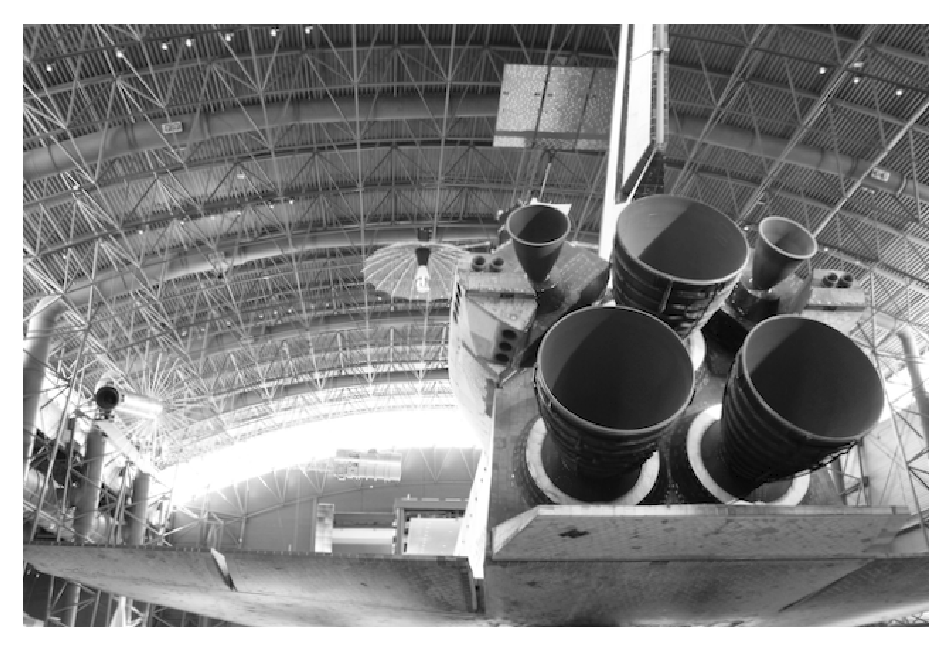

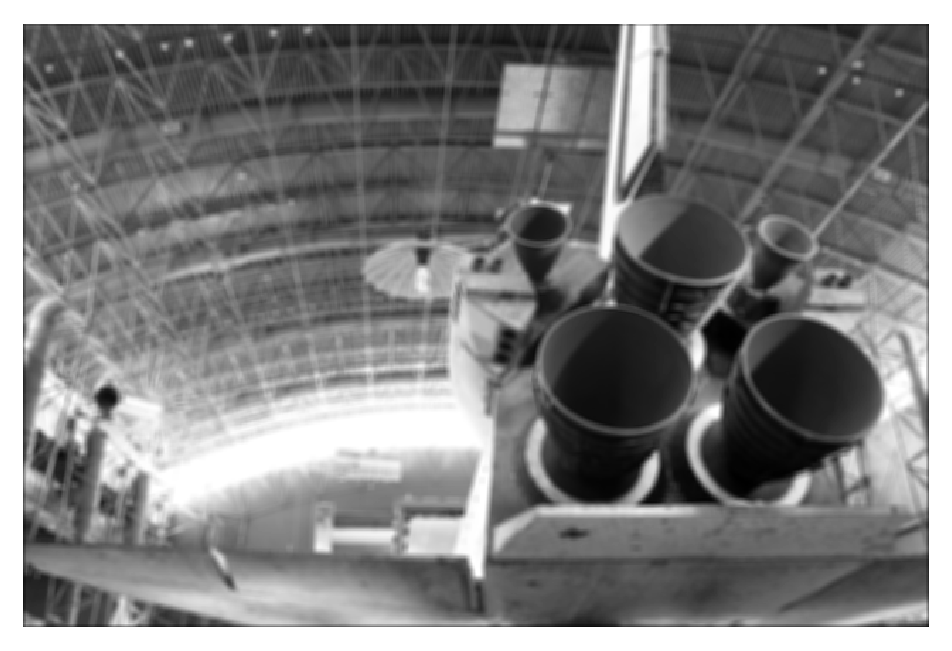

In [5]:
img = cv2.imread("IMG_0893.png",cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

img_filtered = mae6292.convolve2d(img, filter)
cv2_imshow(img_filtered)

### Box Filter
It put more emphasis on the neighboring pixels.

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.   0.   0.   0.   0.   0.01 0.01 0.01]
 [0.01 0.01 0.01 0.   0.   0.   0.   0.   0.01 0.01 0.01]
 [0.01 0.01 0.01 0.   0.   0.   0.   0.   0.01 0.01 0.01]
 [0.01 0.01 0.01 0.   0.   0.   0.   0.   0.01 0.01 0.01]
 [0.01 0.01 0.01 0.   0.   0.   0.   0.   0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


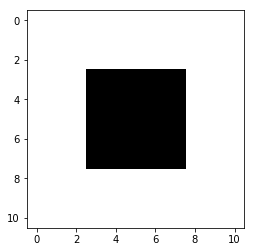

In [79]:
filter = np.ones((11,11))
for i in [3,4,5,6,7]:
    for j in [3,4,5,6,7]:
        filter[i,j]=0

filter = filter/filter.sum()
plt.imshow(filter,cmap='gray')

with np.printoptions(precision=3, suppress=True):
    print(filter)

Since the filter is symmetric both column-wise and row-wise there is no need to flip the filter for convolution.

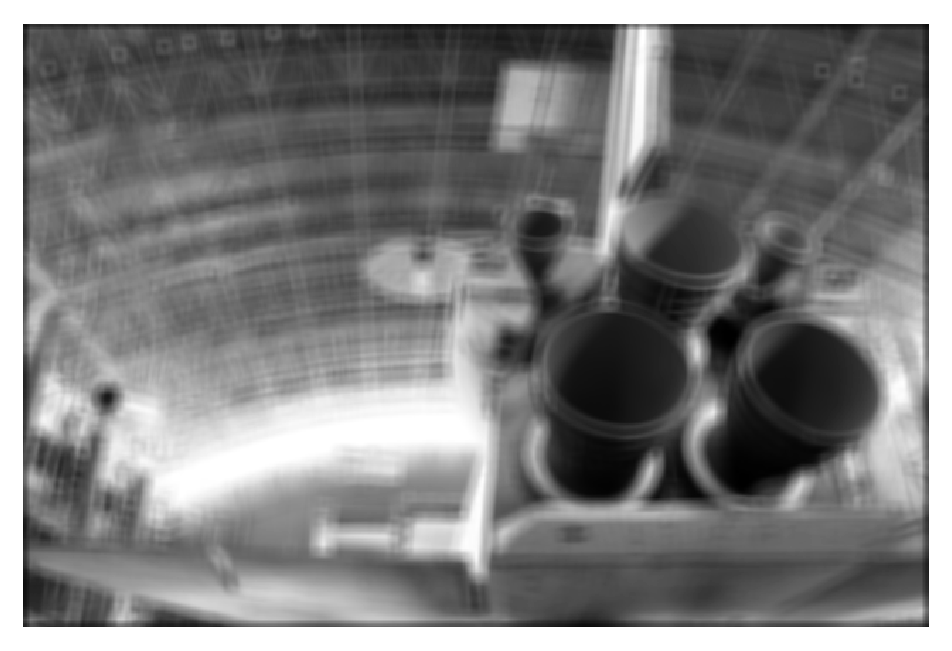

In [81]:
cv2_imshow(mae6292.convolve2d(img, filter))

### Gaussian Filters

1D Gaussian distribuiton is illustrated as follows.

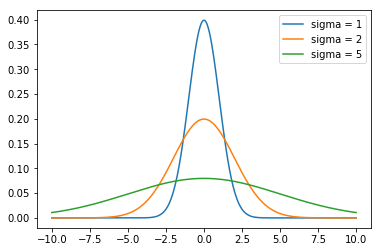

In [82]:
x = np.linspace(-10,10, 501)
mu = 0
for sigma in [1, 2, 5]:
  p = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/2/sigma**2)
  plt.plot(x,p,label='sigma = '+str(sigma))

plt.legend()


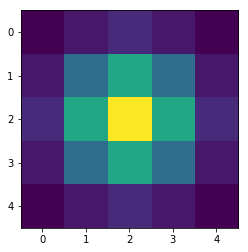

In [83]:
W = 2
sigma = 1

filter_gau = mae6292.filter2d('gaussian', W, sigma)
plt.imshow(filter_gau)

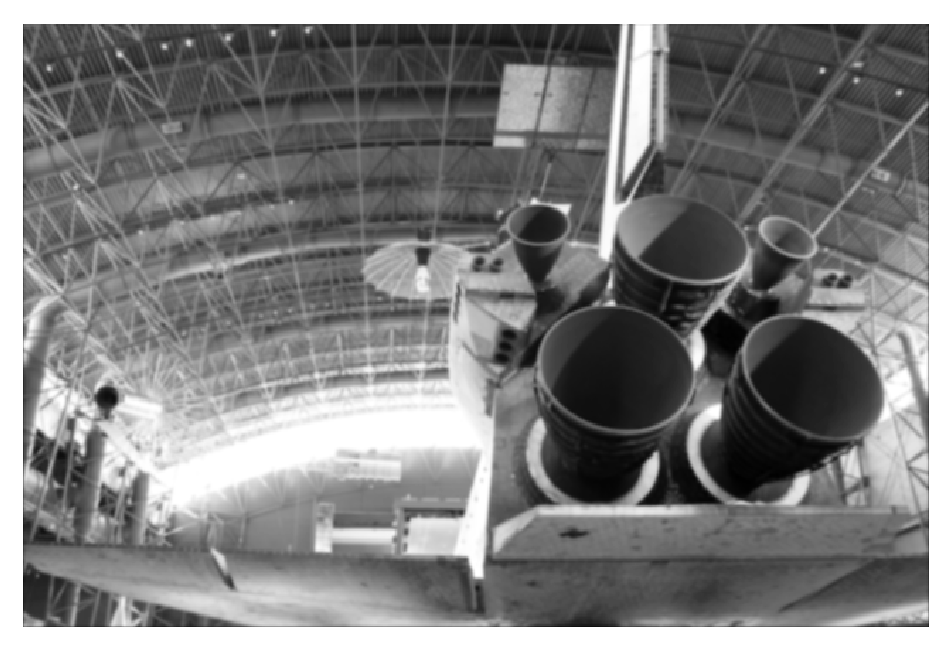

In [84]:
cv2_imshow(mae6292.convolve2d(img, filter_gau))

## Nonlinear Filters

### Median Filter

In [85]:
#!wget https://upload.wikimedia.org/wikipedia/commons/f/f4/Noise_salt_and_pepper.png
img_salt_pepper = cv2.imread('Noise_salt_and_pepper.png',cv2.IMREAD_GRAYSCALE)


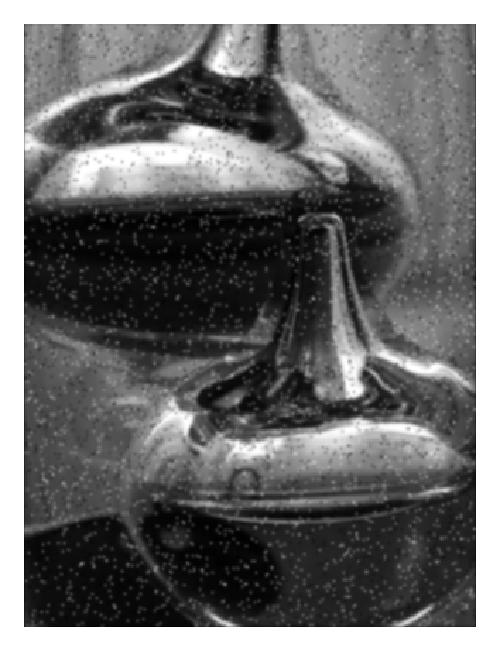

In [87]:
cv2_imshow(mae6292.convolve2d(img_salt_pepper, filter_gau))

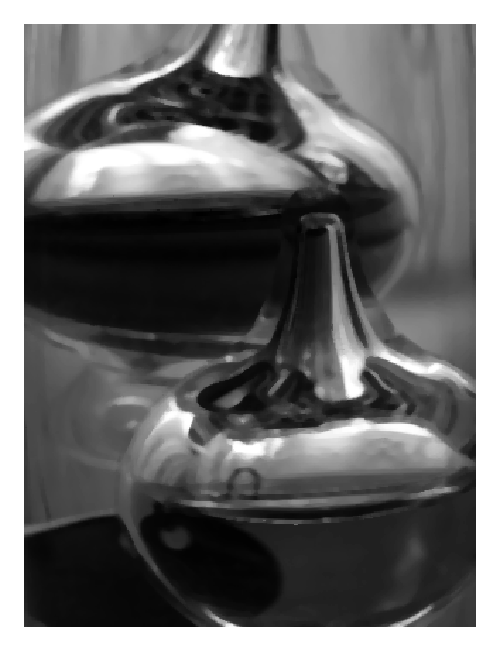

In [88]:
cv2_imshow(cv2.medianBlur(img_salt_pepper,5))

### Bilateral Filter

In OpenCV, this is implemented by [cv2.bilateralFilter](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed), which takes four inputs of `(img, filter size, sigma_range, sigma_distance)`

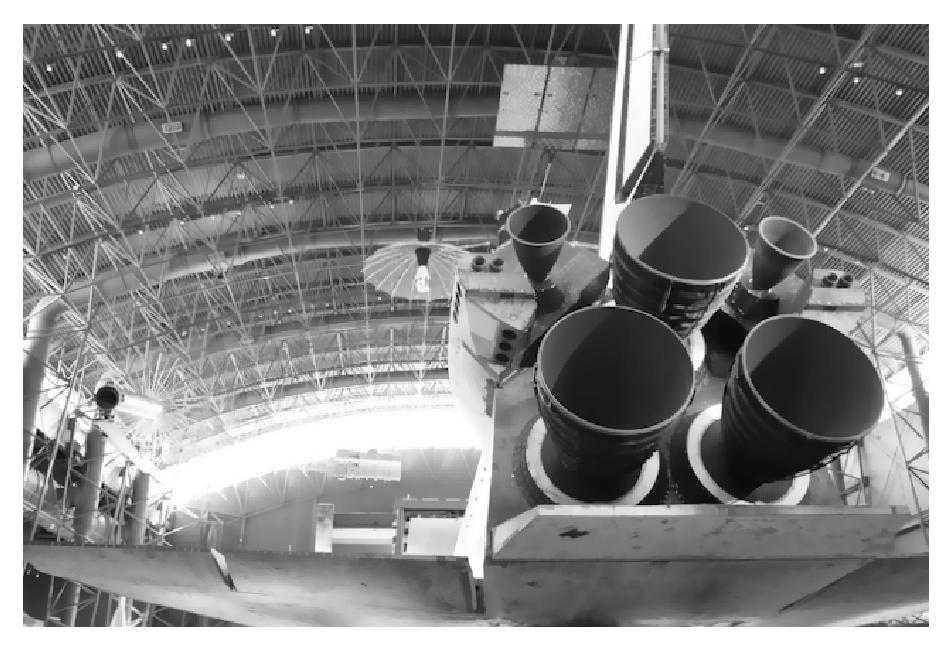

In [89]:
cv2_imshow(cv2.bilateralFilter(img.copy(), 9, 10, 5))

# Edge Detection

## Image Gradient

Visualization of image gradient

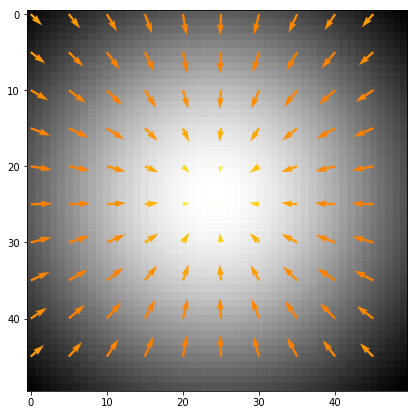

In [90]:
# code adoped from https://stackoverflow.com/questions/42777513/display-sparse-quiver-arrows-using-matplotlib and modified

import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y, x0,y0, sig: np.exp((-(x-x0)**2- (y-y0)**2)/sig**2)
X,Y = np.meshgrid(np.arange(50), np.arange(50))
array = f(X,Y, 24,24, 30)

dy, dx = np.gradient(array)

n = 5
plt.figure(figsize=(7, 7))
plt.imshow(array, cmap='gray')
plt.quiver(X[::n,::n],Y[::n,::n],dx[::n,::n], -dy[::n,::n], 
           np.sqrt(dx[::n,::n]**2+dy[::n,::n]**2),
           units="xy", scale=0.01, cmap="Wistia")
plt.show()

The partial derivates in the calculation of gradient can be approximated by a finite-difference rule, so that they can be computed by convolution or linear filtering.

For example, Frewitt filter is represented by the (convolution) kernel:
\begin{align*}
G_x = \begin{bmatrix} 
1 & 0 & -1\\
1 & 0 & -1\\
1 & 0 & -1\
\end{bmatrix}
,\quad
G_y = \begin{bmatrix}
1 & 1 & 1 \\
0 & 0 & 0 \\
-1 & -1 & -1
\end{bmatrix}.
\end{align*}

THe sobel filter is given by
\begin{align*}
G_x = \begin{bmatrix} 
1 & 0 & -1\\
2 & 0 & -2\\
1 & 0 & -1\
\end{bmatrix}
,\quad
G_y = \begin{bmatrix}
1 & 2 & 1 \\
0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}.
\end{align*}
Note the sign is flipped as these are kernel for convolution. 

In OpenCV, the Sobel filter is implemented by [cv2.Sobel](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d), which takes four inputs of `(img, filter size, sigma_range, sigma_distance)`



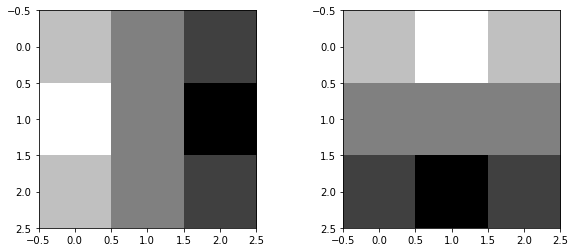

In [91]:
Gx = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
Gy = Gx.T

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(Gx, cmap='gray')
ax2.imshow(Gy, cmap='gray')

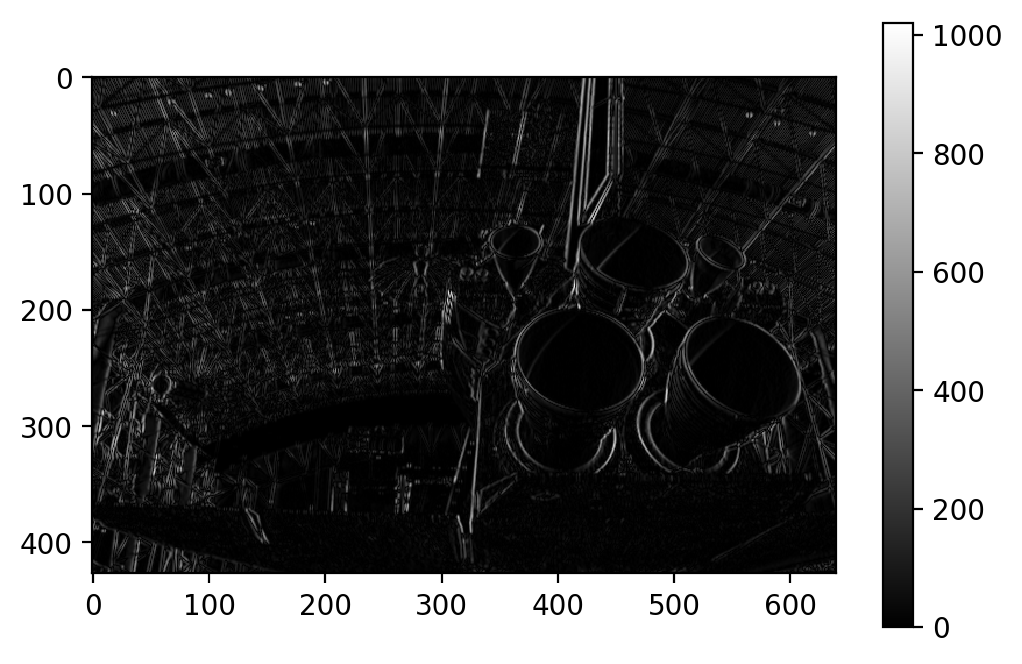

In [97]:
plt.figure(dpi=200)
img_grad_x = mae6292.convolve2d(img,Gx)

plt.imshow(np.absolute(img_grad_x), cmap='gray')
plt.colorbar()


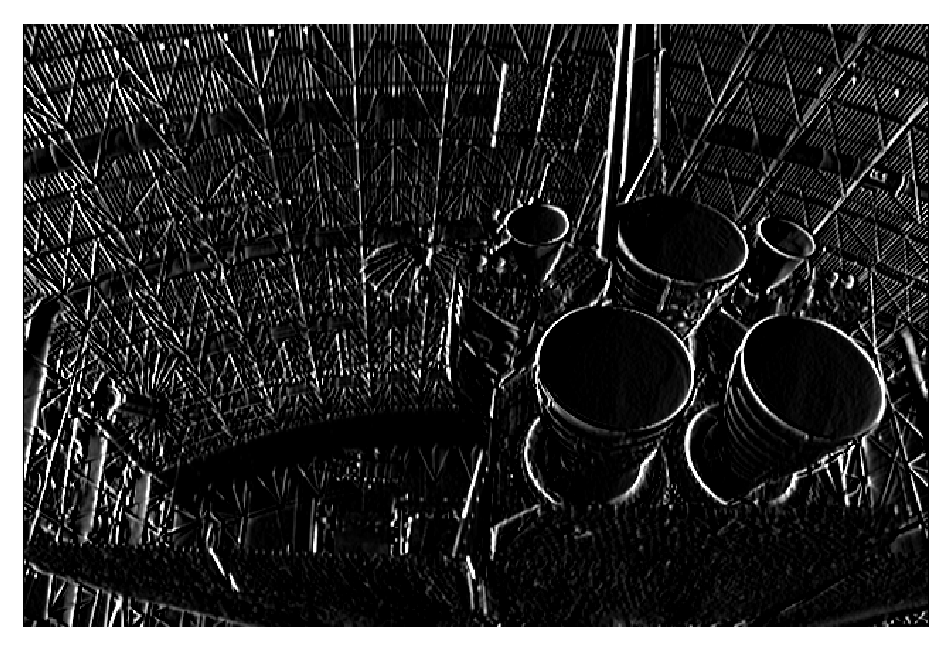

In [94]:
cv2_imshow(cv2.Sobel(img, cv2.CV_8U, 1, 0))

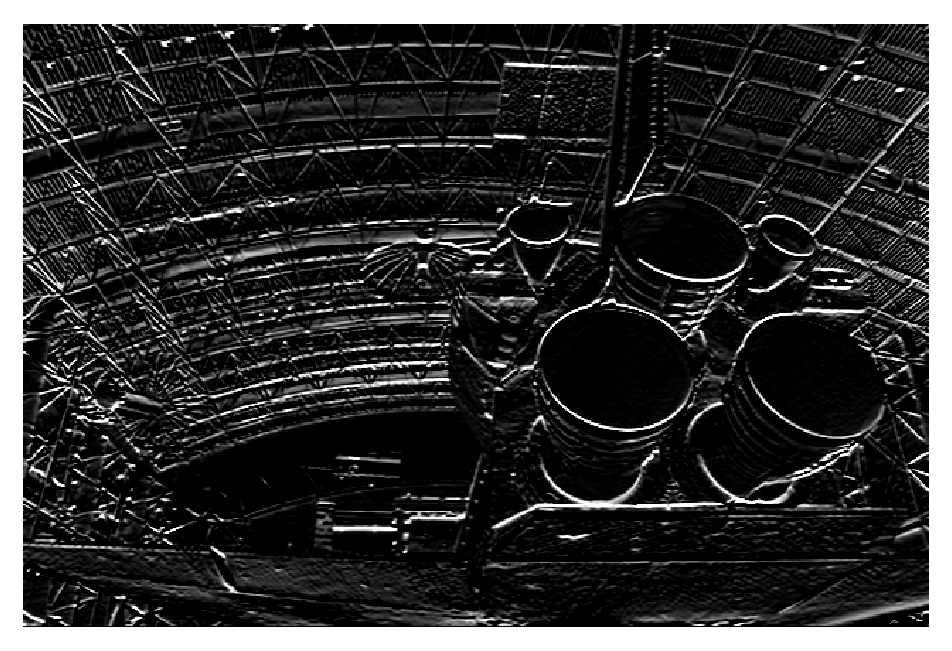

In [95]:
cv2_imshow(cv2.Sobel(img, cv2.CV_8U, 0, 1))

## Effects of Noise

### Derivatives of the Gaussian filter

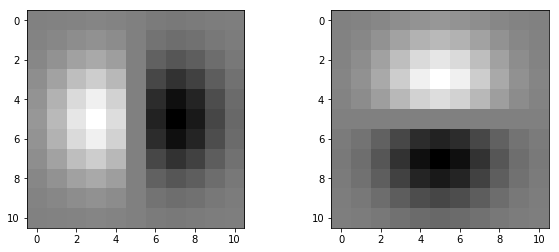

In [140]:
importlib.reload(mae6292)
# W, sigma = 5, 0.5
W, sigma = 5, 2

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

filter_dgau_x=mae6292.filter2d('dgau_x',W,sigma)
filter_dgau_y=mae6292.filter2d('dgau_y',W,sigma)

ax1.imshow(filter_dgau_x, cmap='gray')
ax2.imshow(filter_dgau_y, cmap='gray')


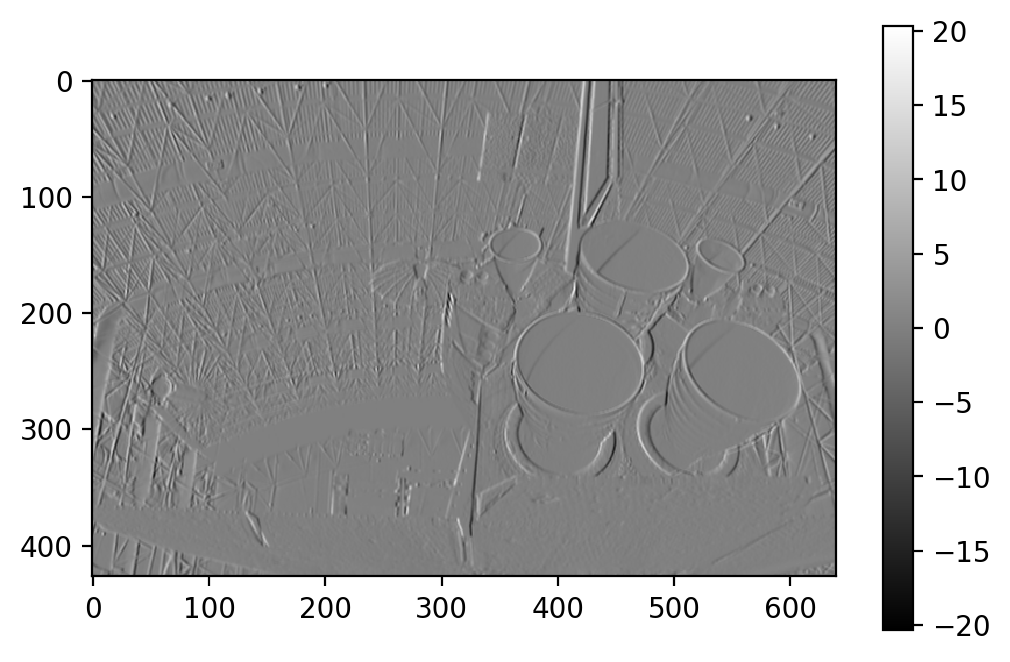

In [142]:
W, sigma = 1, 2

filter_dgau_x=mae6292.filter2d('dgau_x',W,sigma)
filter_dgau_y=mae6292.filter2d('dgau_y',W,sigma)

img_dgau_x = mae6292.convolve2d(img,filter_dog_x)
img_dgau_y = mae6292.convolve2d(img,filter_dog_y)

plt.figure(dpi=200)
plt.imshow(img_dgau_x, cmap='gray')
plt.colorbar()

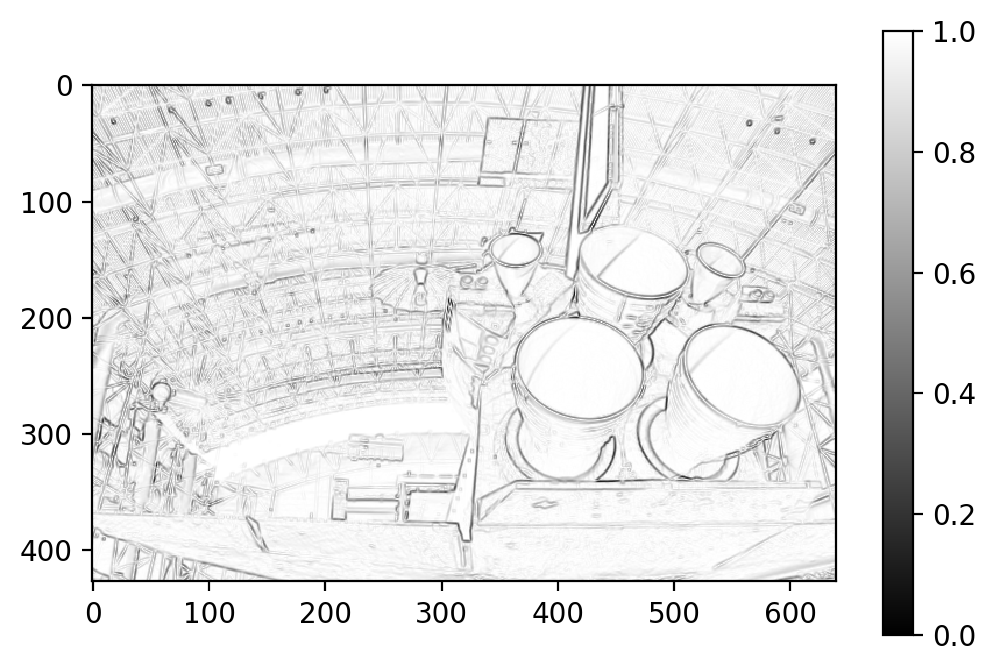

In [144]:
edge_dgau = np.sqrt(img_dgau_x**2 + img_dgau_y**2)
edge_dgau = edge_dgau/edge_dgau.max()

plt.figure(dpi=200)
plt.imshow(1-edge_dgau, cmap='gray')
plt.colorbar()


### Laplacian Filter

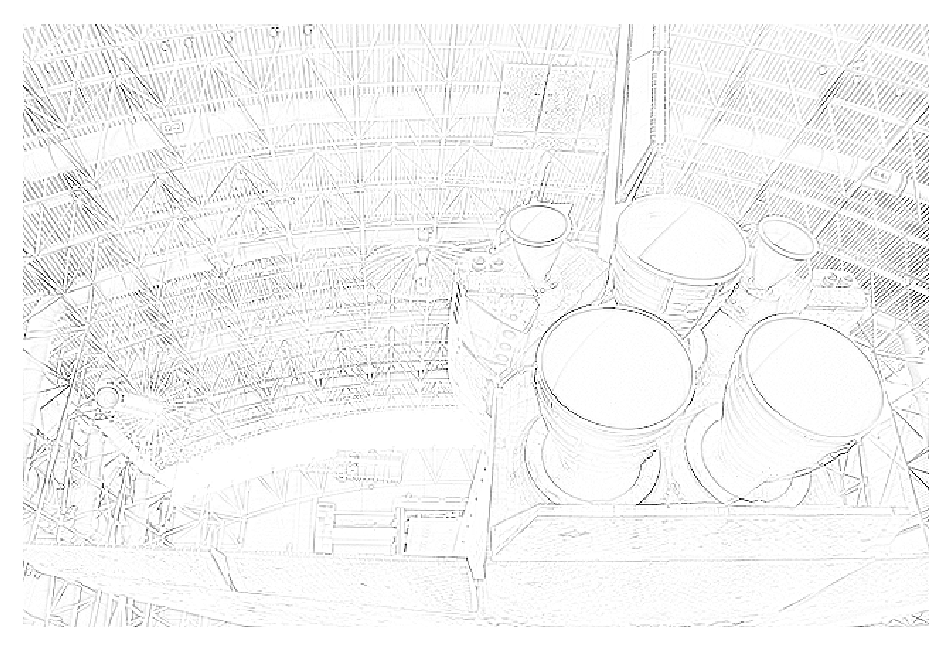

In [132]:
img_laplacian = cv2.Laplacian(img,-1)

cv2_imshow(255-img_laplacian)


### Laplacian of Gaussian Filter

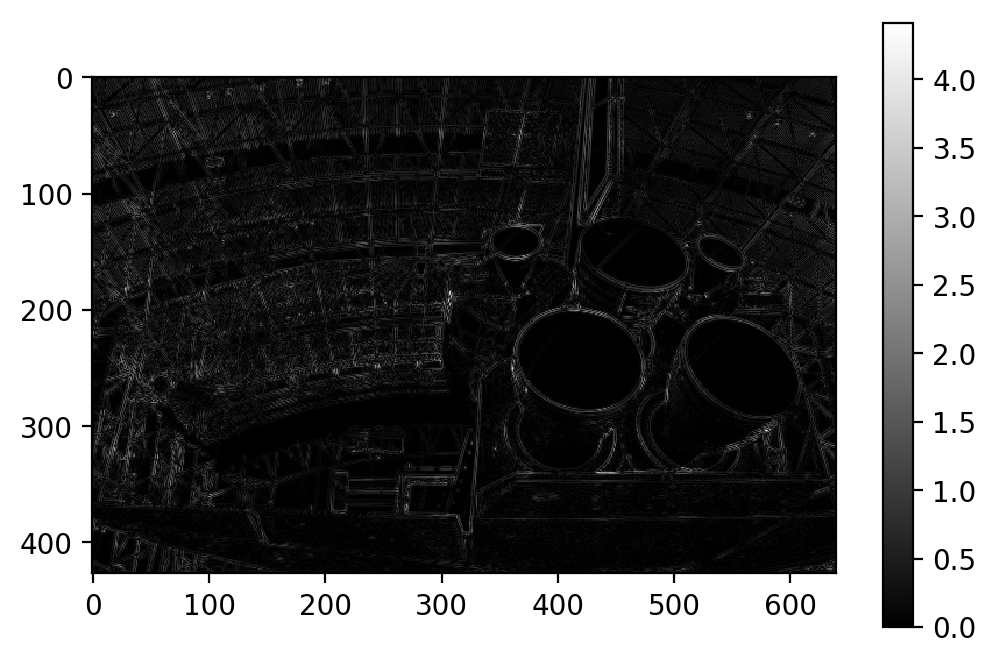

In [8]:
W = 1
sigma = 2
filter_log = mae6292.filter2d('log',W,sigma)
img_log = mae6292.convolve2d(img, filter_log)

plt.figure(dpi=200)
plt.imshow(img_log, cmap='gray')
# plt.imshow(np.abs(img_log), cmap='gray')
plt.colorbar()

# Canny Edge Detection

See [cv2.Canny()](https://docs.opencv.org/master/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)

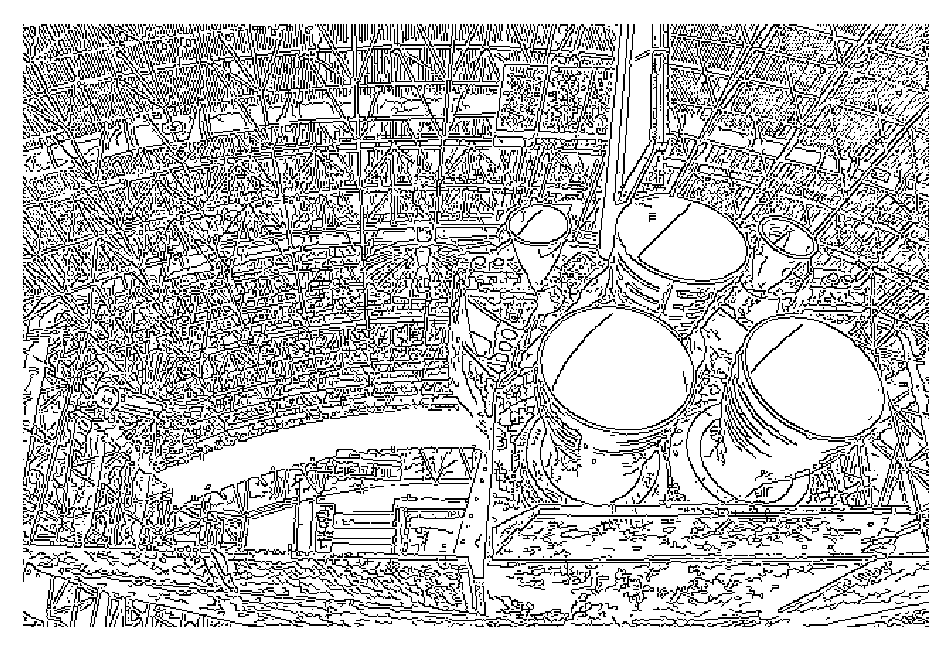

In [146]:
cv2_imshow(255-cv2.Canny(img,30,60))

# Template Matching


Define a template


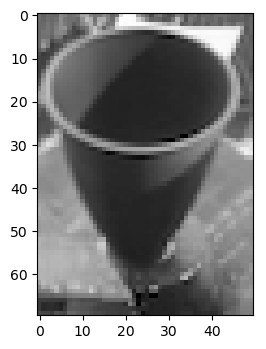

In [157]:
img_template = img[125:195, 340:390]
plt.figure(dpi=100)
plt.imshow(img_template, cmap='gray')

See [cv2.matchTemplate()](https://docs.opencv.org/3.4/df/dfb/group__imgproc__object.html#ga586ebfb0a7fb604b35a23d85391329be) and [cv2.minMaxLoc()](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gab473bf2eb6d14ff97e89b355dac20707),

* cv2.TM_SQDIFF : sum of squared difference (SSD)
* cv2.TM_SQDIFF_NORMED : noramlized SSD
* cv.TM_CCORR : cross correlation (CC)
* cv2.TM_CCORR_NORMED: normalized cross correlation (NCC)
* cv2.TM_CCOEFF_NORMED: zero mean normalized cross correlation (ZNCC)

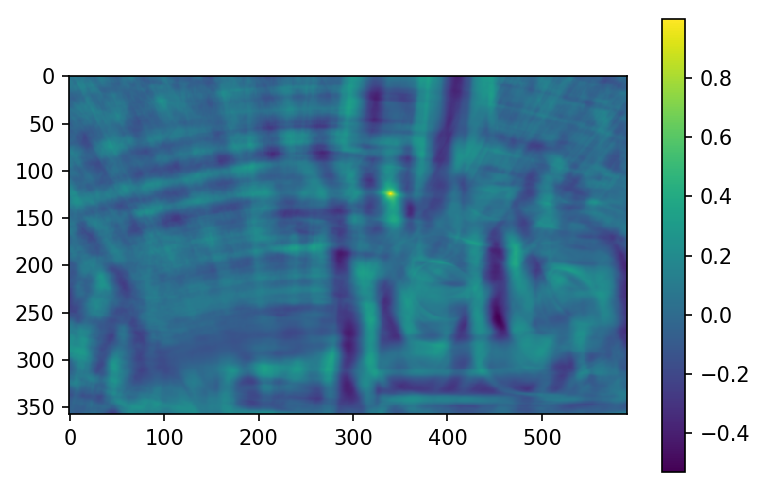

In [162]:
res = cv2.matchTemplate(img,img_template,cv2.TM_CCOEFF_NORMED)

plt.figure(dpi=150)
plt.imshow(res)
plt.colorbar()

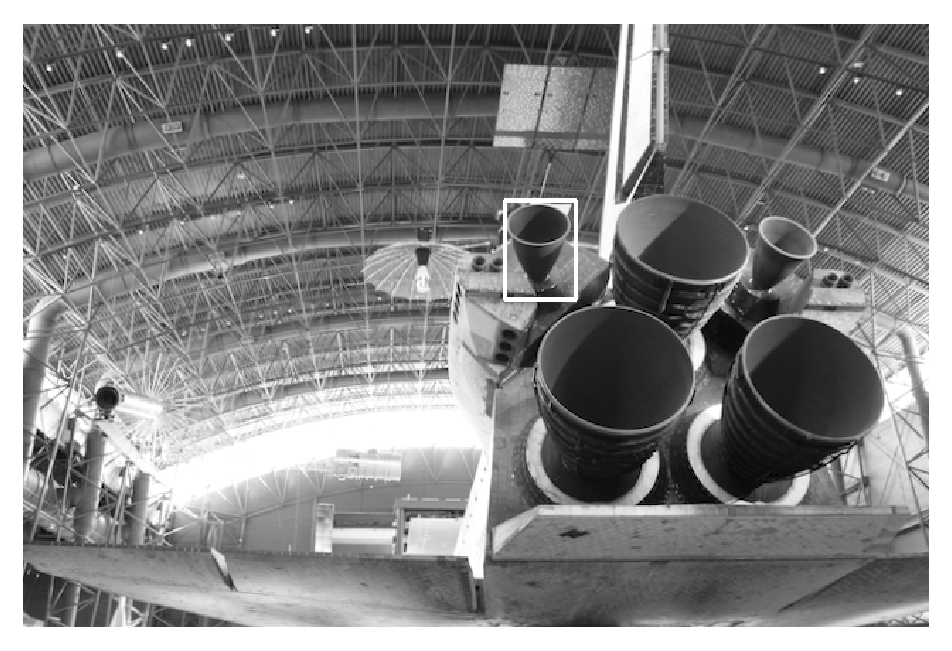

In [151]:
img_matched = img.copy()
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
cv2.rectangle(img_matched, max_loc, (max_loc[0] + img_template.shape[1], max_loc[1] + img_template.shape[0]), 255, 2)
cv2_imshow(img_matched)

In [152]:
print(max_loc)

(340, 125)
